In [1]:
from qiskit import *
from qiskit import IBMQ

In [2]:
qr = QuantumRegister(2)
cr = ClassicalRegister(2)

In [3]:
circuit = QuantumCircuit(qr, cr)

In [4]:
circuit.draw()

q0_0: 
      
q0_1: 
      
c0_0: 
      
c0_1:

In [5]:
circuit.h(qr[0])
circuit.cx(qr[0], qr[1])
circuit.draw()

┌───┐     
q0_0: ┤ H ├──■──
      └───┘┌─┴─┐
q0_1: ─────┤ X ├
           └───┘
c0_0: ══════════
                
c0_1: ══════════

In [6]:
circuit.measure(qr, cr)
circuit.draw()

┌───┐     ┌─┐   
q0_0: ┤ H ├──■──┤M├───
      └───┘┌─┴─┐└╥┘┌─┐
q0_1: ─────┤ X ├─╫─┤M├
           └───┘ ║ └╥┘
c0_0: ═══════════╩══╬═
                    ║ 
c0_1: ══════════════╩═

In [7]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator).result()

In [8]:
from qiskit.tools.visualization import plot_histogram

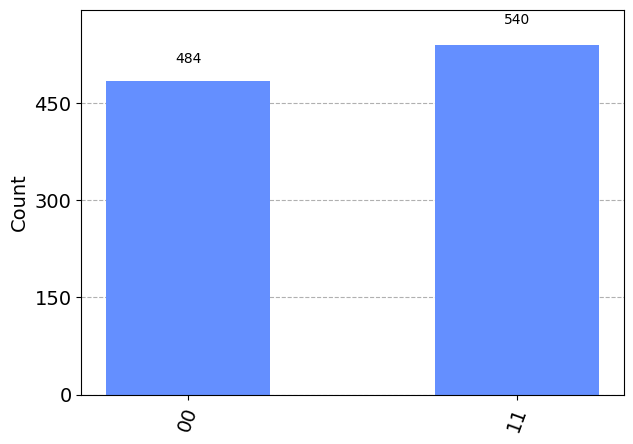

In [9]:
plot_histogram(result.get_counts(circuit))

In [10]:
IBMQ.save_account('f27417b0d0118e6d1e5cd88b1b3ffc209d3f78d21522dffa41a07fde3a443f1215e373d516fb60ef5ae207df05571a1082faefe35c139f22726693f27cabe194')

configrc.store_credentials:WARNING:2023-08-24 18:19:37,507: Credentials already present. Set overwrite=True to overwrite.


In [11]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [12]:
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
print(provider.backends())

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_jakarta') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibm_lagos') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibm_nairobi') from I

In [13]:
qcomp = provider.get_backend('ibmq_lima')

In [14]:
job = execute(circuit, backend=qcomp)
from qiskit.tools.monitor import job_monitor
job_monitor(job)

Job Status: job has successfully run


In [15]:
result = job.result()

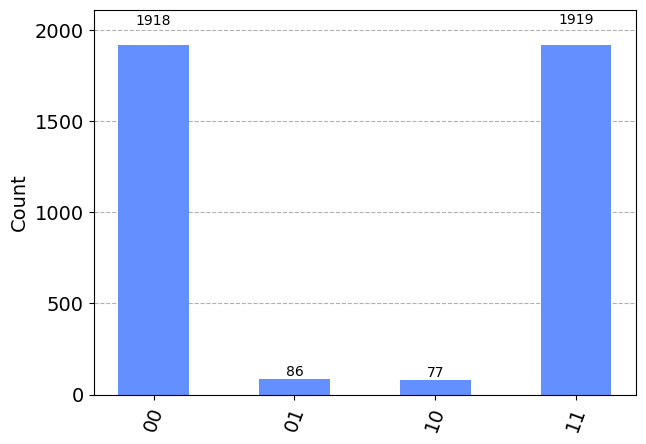

In [16]:
plot_histogram(result.get_counts(circuit))